In [69]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import ensemble
from collections import defaultdict
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import math
from sklearn.metrics import mean_squared_error

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [71]:
df = pd.read_csv('NewCompsData.csv', names=['Company', 'Type','Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin'])
df = df.drop([0],axis=0)
df[['Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']] = df[['Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']].apply(pd.to_numeric)
x = df[['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']] #use
y = df[['Ev/Rev Multiple']]
a = df[['Rev Growth','GP Margin','EBITDA Margin']] #use
b = df[['Rev Growth','GP Margin','EBITDA Margin','R&D Margin',]] #use
c = df[['Rev Growth','GP Margin','EBITDA Margin','S&M Margin']] #use
d = df[['Rev Growth','GP Margin','EBITDA Margin', 'Profit Margin']] #use
e = df[['Rev Growth','GP Margin', 'EBITDA Margin','R&D Margin', 'S&M Margin']] #use
f = df[['Rev Growth','GP Margin', 'EBITDA Margin','R&D Margin', 'Profit Margin']] #use
g = df[['Rev Growth','GP Margin', 'EBITDA Margin','S&M Margin', 'Profit Margin']] #use

In [153]:
df.describe()

,Ev/Rev Multiple,Rev Growth,GP Margin,R&D Margin,S&M Margin,EBITDA Margin,Profit Margin
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,7.369778,0.220629,0.698376,0.197773,0.340789,0.023270,-0.063558
std,4.157309,0.218678,0.131003,0.098734,0.179802,0.254226,0.234884
min,1.256451,-0.032420,0.250568,0.025551,0.032649,-1.461760,-1.626940
25%,4.297306,0.084931,0.604804,0.134940,0.204343,-0.124852,-0.182875
50%,6.524922,0.180033,0.712518,0.182285,0.306999,0.042781,-0.021799
75%,9.666730,0.290122,0.797740,0.233048,0.442356,0.194883,0.085428
max,22.467831,1.444345,0.949200,0.721140,1.214496,0.500626,0.433661


In [72]:
databricks = [0.951862931344295,0.671300585943595,0.577080777881529,0.981899434820076,0.261273981475219,-1.14895360823323,-1.11333236039661]
db = pd.DataFrame([databricks], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
db = db.drop(['G&A Margin'], axis=1)
db3 = db.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
db4 = db.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
db5 = db.drop(['R&D Margin'],axis=1)
db6 = db.drop(['Profit Margin'],axis=1)
db_test = 1600/66.65488
t = 1.98062600245909 #consistent with sample size at 95% confidence interval

In [73]:
GM = df[['GP Margin']]
RG = df[['Rev Growth']]
RD = df[['R&D Margin']]
SM = df[['S&M Margin']]
EM = df[['EBITDA Margin']]
NM = df[['Profit Margin']]

In [74]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)#ALL

In [75]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(c, y, test_size=0.3, random_state=0)#LM

In [76]:
x_train, x_test, y_train, y_test = train_test_split(d, y, test_size=0.3, random_state=0)#AB

In [77]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(g, y, test_size=0.3, random_state=0)#ALL

In [78]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(e, y, test_size=0.3, random_state=0)#ALL

In [79]:
y_val = y.values.flatten()
ytest_val = y_test.values.flatten()
ytrain_val = y_train.values.flatten()

In [125]:
model = LinearRegression()
model = model.fit(x_train0, y_train0)
model.score(x_test0,y_test0)

0.30804628300726644

In [152]:
model2 = ensemble.AdaBoostRegressor(DecisionTreeRegressor(max_depth=9),random_state=0)
model2 = model2.fit(x_train,y_train.values.ravel())
model2.score(x_test,y_test)

0.4870663506135585

In [82]:
for idx, col_name in enumerate(x_train0.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for Rev Growth is 14.147587578957872
The coefficient for GP Margin is 11.63085906280803
The coefficient for EBITDA Margin is -7.02880923393045
The coefficient for S&M Margin is -7.843558824125033
The intercept for our model is -0.9161478104081455


In [40]:
x_train0

,Rev Growth,GP Margin,EBITDA Margin,S&M Margin
76,0.184811,0.680254,-0.429359,0.726084
101,0.177927,0.949200,0.311017,0.123116
92,0.241613,0.715213,0.133657,0.342987
106,0.013955,0.803981,0.093816,0.344453
85,0.178063,0.703654,-0.213805,0.504471
91,0.088235,0.666299,0.106348,0.312515
67,0.216651,0.776422,-0.066416,0.541185
28,0.246186,0.762424,0.003408,0.447258
19,0.337773,0.666697,0.061529,0.283701
100,0.174726,0.754747,-0.322065,0.586534


In [83]:
model3 = ensemble.AdaBoostRegressor(random_state=0)
model3 = model3.fit(x_train1,y_train1.values.ravel())
model3.score(x_test1,y_test1)

0.44658180451426915

In [84]:
model3 = ensemble.AdaBoostRegressor(random_state=0)
model3 = model3.fit(x_train1,y_train1.values.ravel())
model3.score(x_test1,y_test1)

0.44658180451426915

In [85]:
model4 = ensemble.AdaBoostRegressor(random_state=0)
model4 = model4.fit(x_train2,y_train2.values.ravel())
model4.score(x_test2,y_test2)

0.43140875343274515

In [86]:
model5 = ensemble.AdaBoostRegressor(random_state=0)
model5 = model5.fit(x_train3,y_train3.values.ravel())
model5.score(x_test3,y_test3)

0.3603633431286841

In [87]:
model6 = ensemble.GradientBoostingRegressor(random_state=0)
model6 = model6.fit(x_train,y_train.values.ravel())
model6.score(x_test,y_test)

0.5603732316676755

In [88]:
print (model.predict(db4), model2.predict(db3), model3.predict(db),model4.predict(db5),model5.predict(db6),model6.predict(db3) )

[[22.46852028]] [17.24465707] [22.46783098] [12.66547882] [9.18356419] [15.09069799]


In [90]:
yhat = model.predict(c).flatten()
SS_Residual1 = sum((y_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)
SS_Total = sum((y_val-np.mean(y_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-x.shape[1]-1)
print (r_squared,adjusted_r_squared)

3.2196767219064504 7.014672978412176
0.39521070352664434 0.3633796879227835


In [91]:
yhat = model2.predict(d)
yhat = yhat.flatten()
SS_Residual2 = sum((y_val-yhat)**2)
std_err2 = math.sqrt(SS_Residual2/121)
moe_2 = std_err2 * 1.1 * t
print (std_err2,moe_2)
SS_Total = sum((y_val-np.mean(y_val))**2)
r_squared = 1 - (float(SS_Residual2))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-x.shape[1]-1)
print (r_squared,adjusted_r_squared)

2.224548345950982 4.846598127489662
0.7112890482227185 0.6960937349712826


In [92]:
yhat = model.predict(x_test0).flatten()
SS_Residual1 = sum((ytest_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)

regression_model_mse = mean_squared_error(yhat, ytest_val)
print (math.sqrt(regression_model_mse))

SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
print (r_squared,adjusted_r_squared)

2.047365220843568 4.460571272226486
3.7024324584598096
0.30804628300726655 0.22155206838317487


In [93]:
yhat = model2.predict(x_test).flatten()
SS_Residual1 = sum((ytest_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)

regression_model_mse = mean_squared_error(yhat, ytest_val)
print (math.sqrt(regression_model_mse))

SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
print (r_squared,adjusted_r_squared)

1.7460712085463137 3.8041454415711975
3.1575757229286086
0.496719265601684 0.43380917380189454


In [94]:
yhat = model3.predict(x_test1).flatten()
SS_Residual1 = sum((ytest_val-yhat)**2)
std_err1 = math.sqrt(SS_Residual1/121)
moe_1 = std_err1 * 1.1 * t
print (std_err1,moe_1)

regression_model_mse = mean_squared_error(yhat, ytest_val)
print (math.sqrt(regression_model_mse))

SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
r_squared = 1 - (float(SS_Residual1))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
print (r_squared,adjusted_r_squared)

1.830979640488994 3.9891344745182677
3.3111231854042953
0.4465818045142691 0.3774045300785527


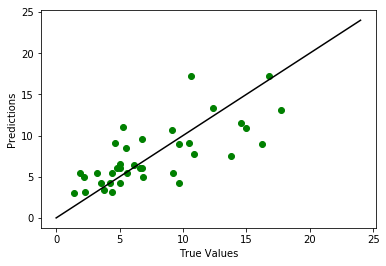

In [132]:
x23 = range(25)
y23 = range(25)
h = model2.predict(x_test)
plt.scatter(y_test,h, c="g")
plt.plot(x23,y23, c="k")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

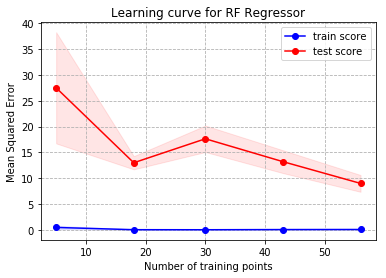

In [144]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_scores = -train_scores
    test_scores = -test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel(r'Mean Squared Error')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show() 
    
# Plot the learning curve
plt.figure()
train_sizes, train_scores, test_scores = learning_curve(
                                            model2, X= x_train, y = ytrain_val, 
                                            cv= 3,  scoring='neg_mean_squared_error')

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RF Regressor') 

In [139]:
best_model = clone(model2)
best_model.fit(x_train, y_train)
y_pred_train = model2.predict(x_train)

print( "Training Root Mean Squared Error %.2f" %( MSE(y_train, y_pred_train)**(1/2)))

Training Root Mean Squared Error 0.34


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



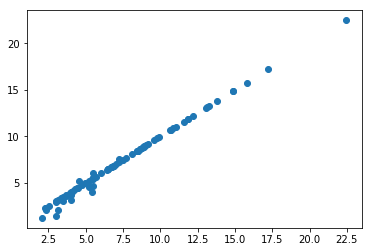

In [141]:
plt.scatter(y_pred_train, y_train)

In [142]:
y_pred_train

array([ 3.99454805, 13.07916859,  5.47094954,  3.0304768 ,  6.52492179,
        5.69244286, 10.6739201 ,  9.78354475,  8.63178225,  4.02792443,
        7.20065257,  6.47357623, 12.17994135,  9.9139303 ,  5.47094954,
        3.49212786,  8.4059795 ,  9.05145434,  4.29730555,  5.21939517,
        3.49212786,  3.9623645 ,  8.6072937 ,  7.05736597,  3.65598436,
        8.09039773,  4.96264693,  4.56664775, 13.29596562,  4.18297826,
        5.48553055, 10.73443143, 11.05783691,  5.48553055,  8.80580838,
        3.35054997,  8.53156218,  4.49080743, 11.85648084,  5.19454454,
        5.50556778,  7.72639986,  6.50295851,  6.41658722,  6.8152068 ,
        8.43144049, 17.24465707, 15.77760471,  6.87166276,  2.34077074,
        3.17163954,  8.8287788 ,  9.16235139,  4.76039301,  7.49446165,
        2.5730514 ,  6.75344914, 10.87628624,  5.39720353,  3.68769072,
       11.84840509,  2.34077074,  8.48214724,  3.03242824,  6.6975161 ,
        3.40510199, 13.11747675, 22.46783098, 13.78150188,  2.98

In [143]:
y_train

,Ev/Rev Multiple
76,3.994548
101,13.079169
92,4.656080
106,1.419239
85,6.524922
91,5.692443
67,10.673920
28,9.783545
19,8.631782
100,3.684081


In [136]:
y_pred_val = best_model.predict(x_test)
print("Root Mean Squared Error on Holdout Set %f" %(MSE(y_test, y_pred_val)**(1/2)))

Root Mean Squared Error on Holdout Set 3.091905


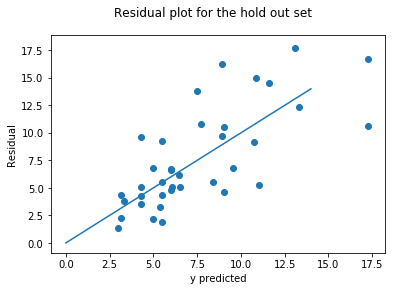

In [137]:
x15 = range(15)
plt.plot(x15,x15)
plt.scatter(y_pred_val, y_test)
plt.suptitle("Residual plot for the hold out set")
plt.xlabel("y predicted")
plt.ylabel("Residual")
plt.show()

In [100]:
plt.scatter(y_pred_val, y_test - y_pred_val)
plt.suptitle("Residual plot for the hold out set")
plt.xlabel("y predicted")
plt.ylabel("residual")
plt.show()

ValueError: Unable to coerce to Series, length must be 1: given 37

In [102]:
yt = y_test

In [103]:
y_pred_val.sort()
ypred_max = y_pred_val[-5:]
print (ypred_max)
y.values.sort()
yt_max = y_test[-5:]
print(yt_max)
ymax_dif = yt_max - ypred_max
stats.describe(ymax_dif)

[10.96161103 11.97772742 12.26403182 12.95795004 13.16519302]
     Ev/Rev Multiple
109        10.846570
62         14.554802
4          16.244587
97          4.386132
7           5.040378


ValueError: Unable to coerce to Series, length must be 1: given 5

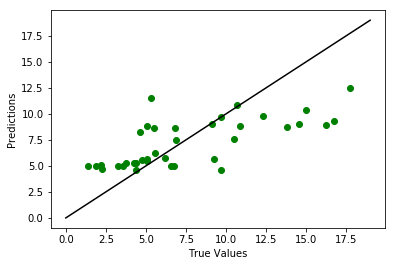

In [105]:
x23 = range(20)
y23 = range(20)
h = model3.predict(x_test1)
plt.scatter(y_test1,h, c="g")
plt.plot(x23,y23, c="k")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

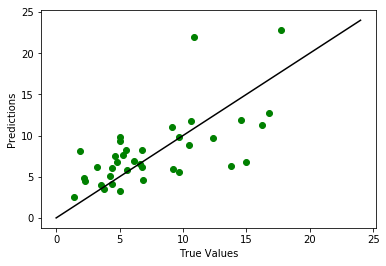

In [106]:
x23 = range(25)
y23 = range(25)
h = model.predict(x_test0)
plt.scatter(y_test0,h, c="g")
plt.plot(x23,y23, c="k")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

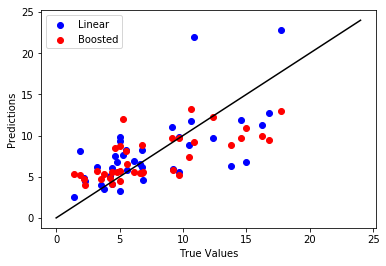

In [107]:
x23 = range(25)
y23 = range(25)
h = model.predict(x_test0)
i = model2.predict(x_test)
plt.scatter(y_test,h,label = "Linear", c="b")
plt.scatter(y_test,i,label = "Boosted", c="r")
plt.plot(x23,y23, c="k")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

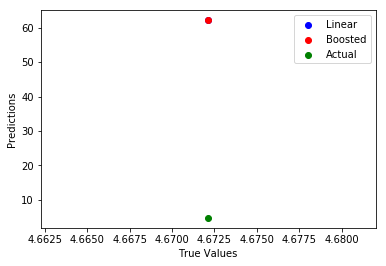

In [108]:
velo = [2.73,0.28,1.31,1.10,0.28,-3.69,-3.81]
vc = pd.DataFrame([velo], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
vc = vc.drop(['G&A Margin'], axis=1)
vc3 = vc.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
vc4 = vc.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
vc5 = vc.drop(['R&D Margin'],axis=1)
vc6 = vc.drop(['Profit Margin'],axis=1)
vc_test = 285/61
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
vcp1 = model.predict(vc4)
plt.scatter(vc_test,vcp1,label = "Linear", c="b")
vcp2 = model2.predict(vc3)
plt.scatter(vc_test,vcp1,label = "Boosted", c="r")
plt.scatter(vc_test,vc_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

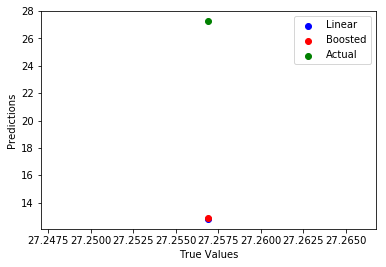

In [109]:
crowd = [0.433,0.547,0.472,0.901,0.240,-0.967,-1.086]
cr = pd.DataFrame([crowd], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
cr = cr.drop(['G&A Margin'], axis=1)
cr3 = cr.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
cr4 = cr.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
cr_test = 3150/115.567
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
crp1 = model.predict(cr4)
plt.scatter(cr_test,crp1,label = "Linear", c="b")
crp2 = model2.predict(cr3)
plt.scatter(cr_test,crp2,label = "Boosted", c="r")
plt.scatter(cr_test,cr_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

In [120]:
meso = [1.685,.73,0.506,0.375,0.119,-3.25,-3.25]
ms = pd.DataFrame([meso], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
ms = ms.drop(['G&A Margin'], axis=1)
ms3 = ms.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
ms4 = ms.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
ms_test = 650/10.8
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
msp1 = model.predict(ms4)
plt.scatter(ms_test,msp1,label = "Linear", c="b")
msp2 = model2.predict(ms3)
plt.scatter(ms_test,msp2,label = "Boosted", c="r")
plt.scatter(ms_test,ms_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

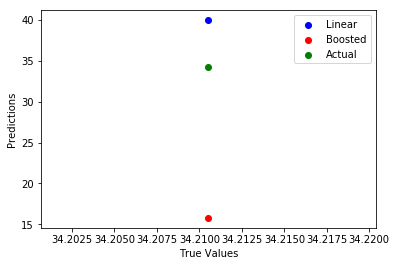

In [111]:
meso = [.672,.73,0.506,0.375,0.119,-3.25,-3.25]
ms = pd.DataFrame([meso], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
ms = ms.drop(['G&A Margin'], axis=1)
ms3 = ms.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
ms4 = ms.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
ms_test = 650/19
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
msp1 = model.predict(ms4)
plt.scatter(ms_test,msp1,label = "Linear", c="b")
msp2 = model2.predict(ms3)
plt.scatter(ms_test,msp2,label = "Boosted", c="r")
plt.scatter(ms_test,ms_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

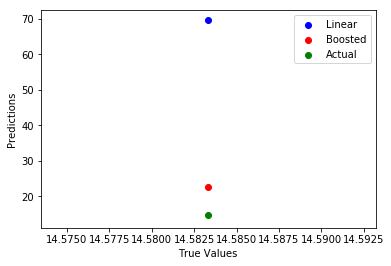

In [112]:
beam = [3.5341,0.82,0.12,0.09,0.240,-1.480,-1.02]
bm = pd.DataFrame([beam], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
bm = bm.drop(['G&A Margin'], axis=1)
bm3 = bm.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
bm4 = bm.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
bm_test = 350/24
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
h = model.predict(bm4)
plt.scatter(bm_test,h,label = "Linear", c="b")
l = model2.predict(bm3)
plt.scatter(bm_test,l,label = "Boosted", c="r")
plt.scatter(bm_test,bm_test,label = "Actual", c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

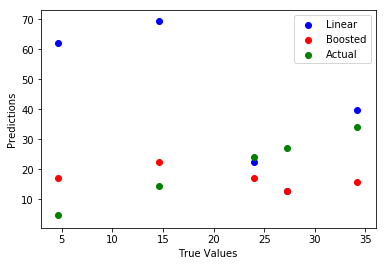

In [113]:
beam = [3.5341,0.82,0.12,0.09,0.240,-1.480,-1.02]
bm = pd.DataFrame([beam], columns = ['Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'G&A Margin','EBITDA Margin', 'Profit Margin'])
bm = bm.drop(['G&A Margin'], axis=1)
bm3 = bm.drop(['R&D Margin', 'S&M Margin'],axis=1) #AB
bm4 = bm.drop(['R&D Margin', 'Profit Margin'],axis=1) #LM
bm_test = 350/24
t = 1.98062600245909 #consistent with sample size at 95% confidence interval
x23 = range(100)
y23 = range(100)
h = model.predict(bm4)
l = model2.predict(bm3)
dbp1 = model.predict(db4)
dbp2 = model2.predict(db3)
plt.scatter(db_test,dbp1, label = "Linear", c="b")
plt.scatter(db_test,dbp2, label = "Boosted", c="r")
plt.scatter(db_test,db_test, label = "Actual", c="g")
plt.scatter(bm_test,h,  c="b")
plt.scatter(bm_test,l, c="r")
plt.scatter(bm_test,bm_test, c="g")
plt.scatter(cr_test,crp1,c="b")
plt.scatter(cr_test,crp2,c="r")
plt.scatter(cr_test,cr_test, c= "g")
plt.scatter(vc_test,vcp1, c="b")
plt.scatter(vc_test,vcp2, c="r")
plt.scatter(vc_test,vc_test, c= "g")
plt.scatter(ms_test,msp1, c="b")
plt.scatter(ms_test,msp2,c="r")
plt.scatter(ms_test,ms_test, c="g")
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig("graph.svg")

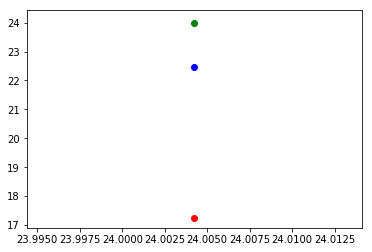

In [121]:
plt.scatter(db_test,dbp1, label = "Linear", c="b")
plt.scatter(db_test,dbp2, label = "Boosted", c="r")
plt.scatter(db_test,db_test, label = "Actual", c="g")

In [114]:
y_val = y.values.flatten()
ytest_val = y_test.values.flatten()

In [115]:
variables = [x,a,b,c,d,e,f,g]
for q in variables:
    x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.2, random_state=0)  
    model = LinearRegression()
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    yhat = model.predict(x_test).flatten()
    SS_Residual1 = sum((ytest_val-yhat)**2)
    std_err1 = math.sqrt(SS_Residual1/121)
    moe_1 = std_err1 * 1.1 * t
    SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
    r_squared = 1 - (float(SS_Residual1))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
    print (adjusted_r_squared)

ValueError: operands could not be broadcast together with shapes (37,) (25,) 

In [116]:
variables = [x,a,b,c,d,e,f,g] 
state = range (100)
newdata={}
for w in state:
    col = []
    for q in variables:
        x_train, x_test, y_train, y_test = train_test_split(q, y, test_size=0.3, random_state=0)  
        model2 = ensemble.AdaBoostRegressor(random_state=w)
        model2.fit(x_train,y_train.values.ravel())
        yhat = model2.predict(x_test).flatten()
        SS_Residual1 = sum((ytest_val-yhat)**2)
        SS_Total = sum((ytest_val-np.mean(ytest_val))**2)
        r_squared = 1 - (float(SS_Residual1))/SS_Total
        adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_val)-1)/(len(ytest_val)-x_test.shape[1]-1)
        col.append(adjusted_r_squared)
        newdata["State{}".format(w)] = col
newcol = pd.DataFrame (newdata)      
newcol.idxmax().value_counts()

4    58
7    22
6    18
1     1
0     1
dtype: int64

In [117]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.grid_search import GridSearchCV

In [118]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

Scaled_Ridge: 0.076473 (+/- 0.484741)
Scaled_Lasso: 0.117250 (+/- 0.207435)
Scaled_Elastic: 0.112937 (+/- 0.157539)
Scaled_SVR: -0.167045 (+/- 0.984365)
Scaled_RF_reg: 0.026864 (+/- 0.325945)
Scaled_ET_reg: 0.278666 (+/- 0.220991)
Scaled_BR_reg: 0.095905 (+/- 0.315426)
Scaled_Hub-Reg: -0.159451 (+/- 0.941134)
Scaled_BayRidge: 0.073528 (+/- 0.446911)
Scaled_XGB_reg: 0.113765 (+/- 0.310067)
Scaled_DT_reg: -0.912743 (+/- 1.150611)
Scaled_KNN_reg: 0.160201 (+/- 0.249122)
Scaled_ADA-Reg: 0.173902 (+/- 0.336624)
Scaled_Linear: 0.072070 (+/- 0.499535)
Scaled_Gboost-Reg: 0.040962 (+/- 0.368392)
Scaled_RFR_PCA: 0.089247 (+/- 0.354739)
Scaled_XGBR_PCA: -0.032488 (+/- 0.400904)


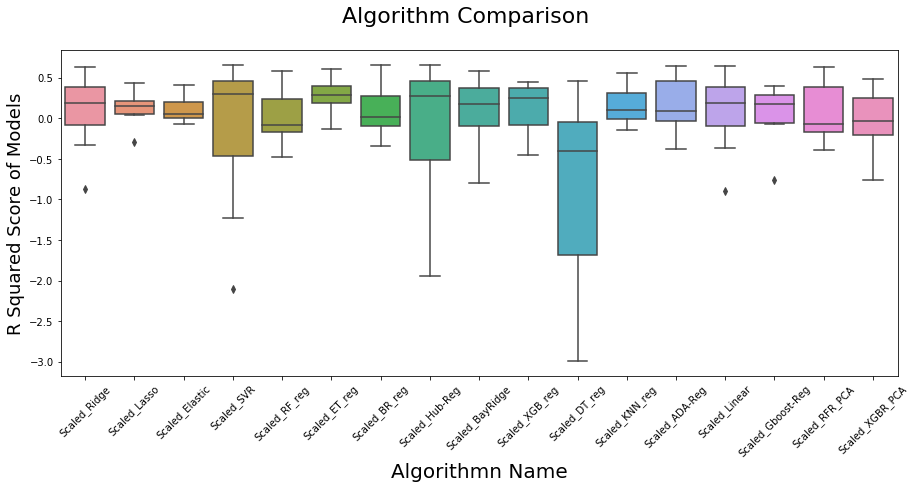

In [122]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
pipelines.append(
                ("Scaled_ADA-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ADA-reg", AdaBoostRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_Linear",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Linear", LinearRegression())
                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train0, y_train0, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()